# Table of Contents

#### Introduction

#### Required libraries

#### The problem domain

#### Getting the data

#### Exploring the data

#### Tidying the data

####  Discover & Visualise the Data to Gain Insights

#### Create Train and Test Set

#### Select and Train Model

#### Final Four Models

#### Other Models Attempted

####  Performance of Models - MSE and RMSE for Final Four Models and Other Models Attempted

#### Peformance on Kaggle


# Introduction

This document deals with predicting the "popularity" of a song, given various attributes of the song. Both Training dataset and test dataset are available which consists of various attributes of different songs.

The Training dataset consists of total of 15 columns out of which 12 columns are numeric values and the remaining 3 columns are string values. The Test dataset conists of all columns present in the training dataset, except for the "popularity" column.

# Required libraries

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that are used are mentioned below:

NumPy: Provides a fast numerical array structure and helper functions.

pandas: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.

scikit-learn: The essential Machine Learning package in Python.

matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.

Seaborn: Advanced statistical plotting library.

# The problem domain

The problem deals with predictinng the popularity of a song by using regression analysis. This will be done by using independent values within our dataset in order to predict our depedent value (popularity).

In order to measure the performance of the regression models, we will use Root Mean Square Error (RMSE). This performace measures, gives an idea of how much errors the system makes when predicitng.

# Getting the Data

Before we model the data, it is important to gain an understanding of the data. This allows us to rectify any problems within the dataset.

We will explore the data through various methods. Let's start by loading the train and test data into our notebook.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [21]:
train = pd.read_csv("CS98XRegressionTrain.csv") 
test = pd.read_csv("CS98XRegressionTest.csv")

# Exploring the Data

In [22]:
#We can take a look at the first few lines of the file by using head()
train.head(5)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [23]:
#info() provides us with details about the number of columns in the data frame, size (number of rows), and the type of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


There are 12 integer columns and 3 text columns. Top Genre appears to be missing values.

In [24]:
train.shape

(453, 15)

In [25]:
test.shape

(114, 14)

453 entries for train, 114 for test. That is a 79.8% training size which is good.

# Tidying The Data

# Remove Missing Values

In [26]:
train.isnull().any() #Identifies features which contain missing values.

Id           False
title        False
artist       False
top genre     True
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [27]:
test.isnull().any() #Identifies features which contain missing values.

Id           False
title        False
artist       False
top genre     True
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
dtype: bool

It can be observed, for both the training and test dataset, that the only feature with missing values is 'top genre.

In [28]:
train_incomplete_rows = train[train.isnull().any(axis=1)].head(50)
train_incomplete_rows

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
8,9,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
26,27,Drinks On The House,Green Martini Keys,NaN,2016,97,16,57,-16,11,15,181,100,5,28
72,73,Pachuko Hop,Ike Carpenter Orchestra,NaN,2006,83,53,48,-9,34,80,135,59,3,28
90,91,Little Things Means A Lot,Jayne Mansfield,NaN,2008,109,29,70,-15,16,63,172,36,4,29
98,99,The Lady Is A Tramp,Mel Torme & the Mel-Tones,NaN,2016,138,60,41,-8,41,54,170,81,6,40
220,221,If I Give My Heart To You,The Teddy Bears,NaN,2011,113,29,49,-10,12,29,118,86,3,40
252,253,Happy Days And Lonely Nights,Suzi Miller And Johnson Brothers,NaN,2012,142,38,65,-8,13,69,146,43,3,27
265,266,Stairway Of Love,Terry Dene,NaN,2015,93,62,62,-7,25,86,120,55,4,27
266,267,You,Ten Sharp,NaN,1991,174,90,41,-8,19,67,273,43,3,61


In [29]:
test_incomplete_rows = test[test.isnull().any(axis=1)].head(50)
test_incomplete_rows

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
66,520,We Are The World,U.S.A. For Africa,NaN,1985,73,45,53,-15,7,29,427,19,4


Train Top Gengre is missing 15 values

In [30]:
train = train.dropna() #drop 15 missing values

Let's now confirm that the missing values have sucessfully been removed.

In [31]:
train.isnull().any()

Id           False
title        False
artist       False
top genre    False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [32]:
test.isnull().any()

Id           False
title        False
artist       False
top genre     True
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
dtype: bool

Missing values for train have been removed. Test missing values must remain because kaggle requires all 114 rows uploaded.

In [33]:
train["top genre"].value_counts()

adult standards          68
album rock               66
dance pop                61
glam rock                16
brill building pop       16
                         ..
latin                     1
american folk revival     1
rock-and-roll             1
mellow gold               1
louisiana blues           1
Name: top genre, Length: 86, dtype: int64

86 different top genre categories. I think its best if we drop this column from regression analysis. would need to 1 hot encode 86 more columns which would slow down our models. this will also avoid 15 missing value issue

In [34]:
train["artist"].value_counts()

Elton John             9
ABBA                   7
Queen                  7
The Beatles            6
Whitney Houston        5
                      ..
The Doobie Brothers    1
Lasgo                  1
Yazoo                  1
Daddy Yankee           1
David Archuleta        1
Name: artist, Length: 331, dtype: int64

In [35]:
train.describe() #describe() gives us a summary of the numeric attributed - their mean, standard deviation, quartiles etc.

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,227.600457,1990.881279,118.326484,60.504566,59.780822,-8.787671,17.605023,59.625571,228.267123,32.191781,5.671233,61.557078
std,130.463047,16.697047,25.175735,22.089660,15.404757,3.591005,13.807492,24.480160,63.426812,29.279912,5.571392,12.759353
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,116.250000,1976.000000,100.000000,44.000000,50.000000,-11.000000,9.000000,42.250000,184.500000,7.000000,3.000000,54.000000
50%,226.500000,1993.000000,120.000000,64.000000,62.000000,-8.000000,13.000000,61.000000,224.000000,23.000000,4.000000,64.000000
75%,340.750000,2006.000000,133.000000,78.000000,70.750000,-6.000000,23.000000,80.000000,264.000000,57.000000,6.000000,72.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,99.000000,47.000000,84.000000


In [36]:
test.describe() #describe() gives us a summary of the numeric attributed - their mean, standard deviation, quartiles etc.

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,510.500000,1990.596491,122.342105,60.877193,58.921053,-8.964912,20.131579,58.368421,227.973684,31.078947,6.263158
std,33.052988,16.545844,26.322650,22.950173,15.022782,3.957584,16.786801,24.286368,63.482345,29.963738,6.594517
min,454.000000,1945.000000,64.000000,6.000000,26.000000,-22.000000,2.000000,11.000000,112.000000,0.000000,3.000000
25%,482.250000,1978.250000,106.000000,44.000000,50.250000,-11.750000,10.000000,36.750000,184.250000,5.250000,3.000000
50%,510.500000,1991.000000,120.000000,59.500000,57.500000,-8.000000,14.000000,61.500000,215.500000,19.500000,4.000000
75%,538.750000,2005.750000,136.750000,80.000000,69.000000,-6.000000,24.000000,79.750000,264.000000,50.250000,6.000000
max,567.000000,2019.000000,191.000000,98.000000,94.000000,-1.000000,90.000000,98.000000,444.000000,97.000000,47.000000


Clearly many different means and standard deviation so we should scale our data for certain algorithms to improve performance

# Discover & Visualise the Data to Gain Insights

We can carry out a correlation matrix to gain a better understanding of the data. Correlation values indicate the strength of a linear relationship between values. 

In [37]:
corr_matrix = train.corr()
corr_matrix
corr_matrix["pop"].sort_values(ascending=False)

pop      1.000000
dur      0.321028
dB       0.312952
nrgy     0.274006
dnce     0.256099
spch     0.130346
Id       0.072073
bpm      0.042695
year     0.018926
live    -0.025493
val     -0.040035
acous   -0.443763
Name: pop, dtype: float64

From our correlation matrix, it can be observed that "acous", "dur", "dB", "nrgy", "dnce" have the strongest correlations with song popularity. This indicates that these features should be used when building our models.

<AxesSubplot:>

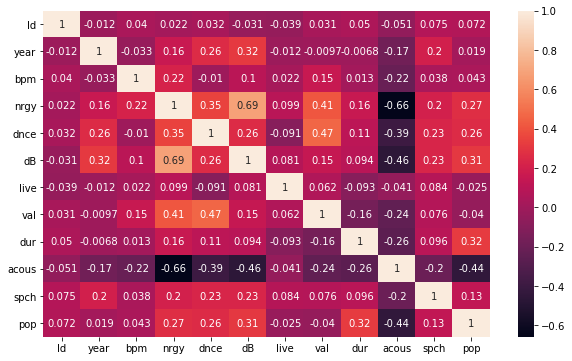

In [95]:
import seaborn as sns

corr = train.corr() # The correlation between scaled numeric columns is plotted using a heatmap as shown below :
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

Correlation coefficient values above 0.5 or below -0.5 are considered to inidcate strong value of correlation between the features

In [96]:
u = corr[corr > 0.5]
v = corr[corr < -0.5]

In [97]:
u

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bpm,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nrgy,NaN,NaN,NaN,1.000000,NaN,0.687504,NaN,NaN,NaN,NaN,NaN,NaN
dnce,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dB,NaN,NaN,NaN,0.687504,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
live,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
val,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
dur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
acous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [98]:
v

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nrgy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.658299,NaN,NaN
dnce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
val,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acous,NaN,NaN,NaN,-0.658299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the output of the above commands it can be seen that there is hardly any strong correlation between features, let us explore whether mild correlation exists (correlation above 0.25 or correlation below -0.25)

In [99]:
u = corr[corr > 0.25]
v = corr[corr < -0.25]

In [100]:
u

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,1.000000,NaN,NaN,0.255916,0.317036,NaN,NaN,NaN,NaN,NaN,NaN
bpm,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nrgy,NaN,NaN,NaN,1.000000,0.345836,0.687504,NaN,0.411215,NaN,NaN,NaN,0.274006
dnce,NaN,0.255916,NaN,0.345836,1.000000,0.255577,NaN,0.467307,NaN,NaN,NaN,0.256099
dB,NaN,0.317036,NaN,0.687504,0.255577,1.000000,NaN,NaN,NaN,NaN,NaN,0.312952
live,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
val,NaN,NaN,NaN,0.411215,0.467307,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
dur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.321028
acous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [101]:
v

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nrgy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.658299,NaN,NaN
dnce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.389641,NaN,NaN
dB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.460821,NaN,NaN
live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
val,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.260960,NaN,NaN
acous,NaN,NaN,NaN,-0.658299,-0.389641,-0.460821,NaN,NaN,-0.26096,NaN,NaN,-0.443763


Let's now take those five features which were previously identified and carry our a scatter matrix. We will use matplotlib to visualise this.

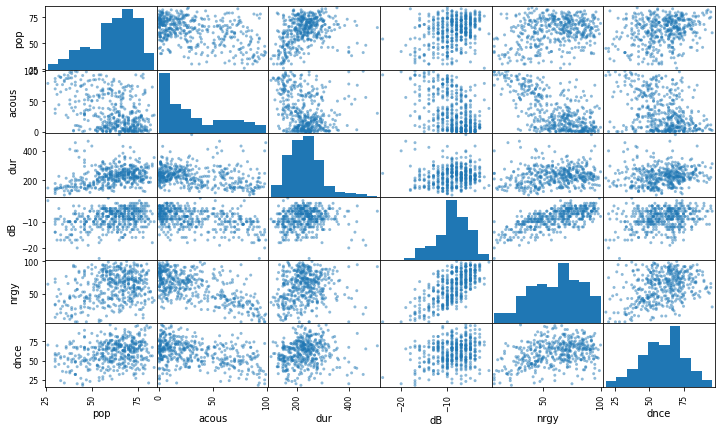

In [102]:
from pandas.plotting import scatter_matrix
attributes = ["pop","acous", "dur", "dB", "nrgy", "dnce" ]
scatter_matrix(train[attributes], figsize=(12,7))
plt.show()

From our scatter matrix visualisation, it is easier to see the linear relationship between pop and dur. In addition, there is  a positive linear relationship between dB and nrgy.

No further clear linear relationships can be observed between other features. 

Let's now investigate the linear relationship between db and nrgy in more detail.

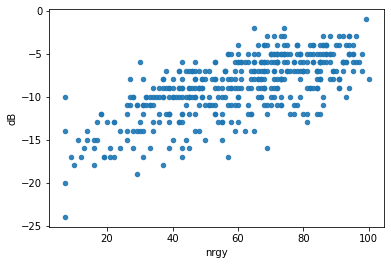

In [103]:
#plotting energy vs loudness
train.plot(kind="scatter", x="nrgy", y="dB",
             alpha=0.9)
plt.show()

Plotting histograms of these attributes gives us a more details picture of the range and spread of values.

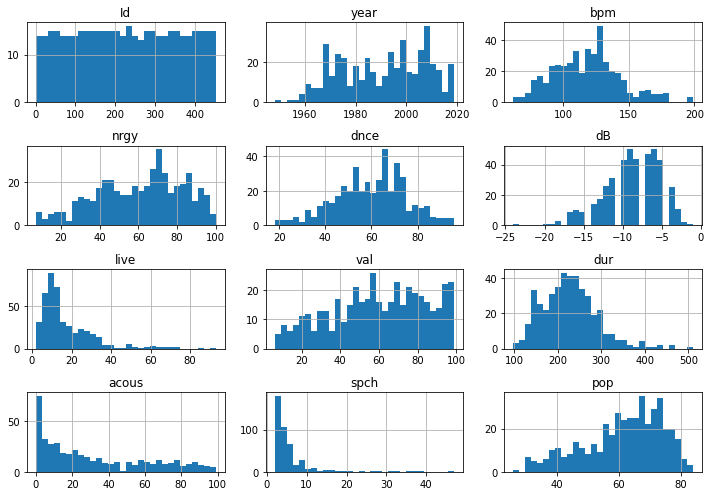

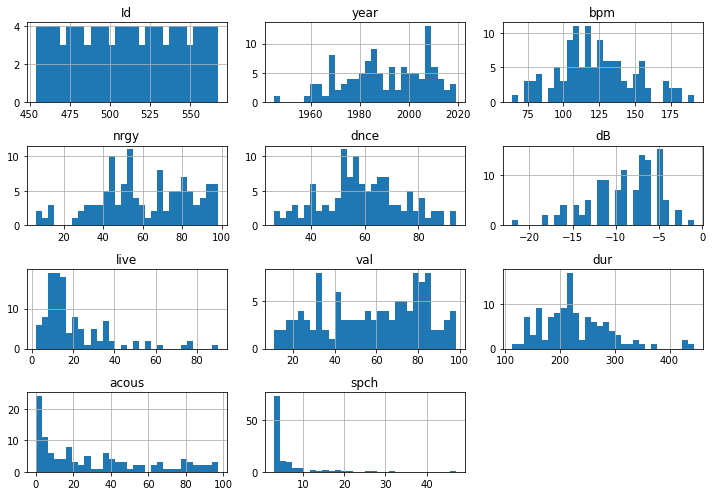

In [104]:
%matplotlib inline
train.hist(bins=30, figsize=(10,7))
plt.tight_layout()
test.hist(bins=30, figsize=(10,7))
plt.tight_layout()
plt.show()

From the histograms, it can be observed that the test and train data share similar skews and distribution. Therefore, stratified sampling is not required. 

# Create a Train & Test Set

Let's drop the string features from our test and train set. In addition, we will identify our dependent variable and label this y_train.

Futhermore, we have decided not to futher split our training set by the train_test_split function as this would result in an smaller training set. Given that the train and test files were roughly 80%/20% train/test data, it makes sense to continue with this. Moreover, as we're working with a relatively small dataset and most machine learning projects will be built on huge amounts of data, it would be counter productive to reduce our training set again. We will use cross validate to measure our trained models against various folds in our training set.

# Prepare the Data

In [38]:
X_train_num = train.drop(["Id", "title","artist","top genre","pop"], axis=1)
X_test_num = test.drop(["Id", "title","artist","top genre"], axis=1)
y_train = train["pop"].copy()



We have dropped the appropiate features and only the numerical features remain.

# Handling the Categorical Data

Now we one hot encode the "top genre" category because we believe this will help our models predict the popularity scores. One hot encoding takes a string variable and turns it into a array based on binary yes or no inputs. In this case we are adding 86 1-hot encoded columns to our train and test sets for analysis.

In [39]:
train_cat = train["top genre"]
test_cat = test["top genre"]

In [40]:
train_cat_encoded, train_categories = train_cat.factorize()
test_cat_encoded, test_categories = test_cat.factorize()

After factorizing this column, we change the train_cat array into a dataframe for the 1 hot encoder to work

In [41]:
train_cat =  pd.DataFrame(train["top genre"]) #categorical data I want to retain
test_cat =  pd.DataFrame(test["top genre"])

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
train_cat_1hot = encoder.fit_transform(train_cat)
test_cat_1hot = encoder.transform(test_cat) #test set matches train columns
train_cat_1hot

<438x86 sparse matrix of type '<class 'numpy.float64'>'
	with 438 stored elements in Compressed Sparse Row format>

In [43]:
test_cat_1hot

<114x86 sparse matrix of type '<class 'numpy.float64'>'
	with 99 stored elements in Compressed Sparse Row format>

We transformed the test categorical data frame using the train columns so that our final features would match. This is needed to run our models on the test set.

In [44]:
cat_attribs = ['top genre']
num_attribs = list(X_train_num)

# Feature Scaling

Machine learning algorithms generally perform better when different numerical categories are similarly scaled. Our training data columns have very different scales, therefore we should scale them.

In [45]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
X_train_num_scaled = std_scaler.fit_transform(X_train_num)
X_test_num_scaled = std_scaler.fit_transform(X_test_num)

In [46]:
X_train_num_scaled #Checking our newly scaled data

array([[ 0.30691504, -0.45041131, -1.33720054, ..., -1.23538642,
         1.46370559, -0.48000348],
       [-0.71239335, -0.52994373, -1.11059146, ...,  0.26411561,
        -0.72459281, -0.48000348],
       [-0.65243403,  2.05485975, -1.47316599, ...,  0.05892059,
        -0.24590254, -0.48000348],
       ...,
       [ 0.66667095,  1.97532734, -0.24947694, ...,  0.95862181,
        -0.31428686,  1.49662625],
       [ 0.54675231,  1.85602871,  1.20082119, ..., -0.58823291,
        -0.92974579,  0.41846458],
       [ 0.66667095, -0.52994373,  0.56631576, ...,  0.83234795,
        -0.72459281, -0.6596971 ]])

The data has been sucessfully scaled.

# Recombining Numerical and Categorical Data

Now we need to recombine our numerical data frame with our categorical data frame.

In [47]:
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled)
X_train_num_scaled_df.columns = num_attribs
X_train_num_scaled_df.index = X_train_num.index

X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled) 
X_test_num_scaled_df.columns = num_attribs
X_test_num_scaled_df.index = X_test_num.index

In [48]:
train_cat_1hot_enc = pd.DataFrame(train_cat_1hot.toarray())
train_cat_1hot_enc.columns = train_categories
train_cat_1hot_enc.index = X_train_num.index

test_cat_1hot_enc = pd.DataFrame(test_cat_1hot.toarray())
test_cat_1hot_enc.columns = train_categories
test_cat_1hot_enc.index = X_test_num.index

In [49]:
X_train_scaled = X_train_num_scaled_df.join(train_cat_1hot_enc)
X_test_scaled = X_test_num_scaled_df.join(test_cat_1hot_enc)

Our training and test sets are now prepared to run our Machine Learning Models

# Select and Train a Model

# Linear Regression

Linear regression is a simple, but yet effective model. This effective model is easy to implement and interpret, as well as efficient to train. When we first ran the model, it was quick to implement and got us low RMSE scores.

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error

y_train_pred = lin_reg.predict(X_train_scaled)

lin_mse = mean_squared_error(y_train, y_train_pred) #mean square error
lin_rmse = np.sqrt(lin_mse) #root mean square error
print("Linear Regression RMSE = ",lin_rmse)

Linear Regression RMSE =  8.425851085150708


In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [6.72437975e+11 1.26356242e+12 5.67496597e+12 5.56289834e+11
 9.44953237e+12 5.24636822e+12 5.26548284e+12 7.22637018e+12
 1.34109807e+12 1.51974104e+13]
Mean: 5189351829800.566
Standard deviation: 4413539852395.253


Cross validation performs very bad on this data set so it appears this model has over fitted to the training set.
This could be due to Linear Regression performing generally poor with a large number of less important features.

In [120]:
#kaggle competition
#y_test_pred = lin_reg.predict(X_test_scaled)
#lin_reg_results_v2 = pd.DataFrame({'Id': test.Id, 'Pop': y_test_pred})
#lin_reg_results_v2.to_csv('lin_reg_results_v2.csv', index=False)

# Support Vector Machine Regressor

Supportm Vector Machines are a powerful model which works well with small datasets, which is well suited to the dataset we're using. In additon SVM do not require a great deal of computational power.

# Kernel = Linear

In [53]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear") #using linear kernel
svm_reg.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [54]:
y_train_pred = svm_reg.predict(X_train_scaled)

svm_lin_mse = mean_squared_error(y_train, y_train_pred) #mean square error
svm_lin_rmse = np.sqrt(svm_lin_mse) #root mean square error
print("Support Vector Machine Regressor RMSE = ",svm_lin_rmse)

Support Vector Machine Regressor RMSE =  10.150473986646004


In [55]:
scores = cross_val_score(svm_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [12.40726372 10.85674073 11.13154373  8.09832714 12.00066167 13.1177697
 10.08810596  9.84630407 12.14752206  9.10149388]
Mean: 10.879573266355772
Standard deviation: 1.5120471966657663


Cross validation scores were an improvement on linear regression, however the RMSE score was not as good. 

In [124]:
#kaggle competition
#y_test_pred = svm_reg.predict(X_test_scaled)
#svm_reg_results_v2 = pd.DataFrame({'Id': test.Id, 'Pop': y_test_pred})
#svm_reg_results_v2.to_csv('svm_reg_results_v2.csv', index=False)

# Ensemble Method

Ensemble learning involves using multiple machine learning models to improve predictions. Different machine learning models may  operate differently on different training sets - no one model is guarateed to work better. 

The ensemble learning approach combines multiple models, saving us the time and effort of evalating all possible models. 

There are two main reasons why we have decided to build two ensenble methods:
* Performance - an ensemble approach can make better predictions and achieve a better performance outcome than any single contributing model. 
* Rebustness - an ensemble approach reduces the spread of the predictions and the model's performance

# Random Forest Regressor

Random Forests are an ensemble of decision trees. This powerful model can produce a higher accurary than other algorithms and it has an effective method to estimate any missing data within our dataset, and maintains accurary when there is missing data.
Moreover, since random forest are multiple decision trees the bias remains the same as one decision tree, but the variance decreases, meaning the chances of overfitting also decreases.


In addition, feature importance is another great asset of random forests. This makes it straightforward to measure the relative importance of each of the features.

In [72]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_features=6, max_samples=394)
rnd_reg.fit(X_train_num, y_train)

RandomForestRegressor(max_features=6, max_samples=394, random_state=42)

In [73]:
y_train_pred = rnd_reg.predict(X_train_num)

rnd_mse = mean_squared_error(y_train, y_train_pred) #mean square error
rnd_rmse = np.sqrt(rnd_mse) #root mean square error
print("Random Forest RMSE = ",rnd_rmse)

Random Forest RMSE =  4.379875626348665


In [75]:
scores = cross_val_score(rnd_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [11.09023854  9.75816437  9.7686643   8.57070871 11.32249792 11.67605808
 10.32758775  9.509039   11.09518825  9.5264437 ]
Mean: 10.264459061897043
Standard deviation: 0.9473293599466092


In [76]:
#kaggle competition
y_test_pred = rnd_reg.predict(X_test_num)
rnd_reg_results_v2 = pd.DataFrame({'Id': test.Id, 'Pop': y_test_pred})
rnd_reg_results_v2.to_csv('random_forest_reg_results_v2.csv', index=False)

# Grid Search On Random Forest Regressor

In order to find the best parameteres, we will use GridSearchCV. GridSearchCV is an extremely useful tool which allows us to search through many different parameteres and produces the best combination.

Let's tune our Random Forest Regressor. We'll stick to three parameters for now.


In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 200], 'max_features': [2,4,6,8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rnd_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rnd_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 200]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Best hyperparameter combination for Random Forest Regressor:

In [60]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 200}

In [131]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=500, random_state=42)

We can look at the score of each hyperparameter combo which was tested

In [61]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

12.195515770133316 {'max_features': 2, 'n_estimators': 3}
10.837893281134011 {'max_features': 2, 'n_estimators': 10}
10.182530771563018 {'max_features': 2, 'n_estimators': 200}
12.3045337165853 {'max_features': 4, 'n_estimators': 3}
10.751039061834485 {'max_features': 4, 'n_estimators': 10}
10.284013796498012 {'max_features': 4, 'n_estimators': 200}
11.705379121717577 {'max_features': 6, 'n_estimators': 3}
10.660949735766863 {'max_features': 6, 'n_estimators': 10}
10.208211303025983 {'max_features': 6, 'n_estimators': 200}
11.928963544782818 {'max_features': 8, 'n_estimators': 3}
10.633388003777135 {'max_features': 8, 'n_estimators': 10}
10.181969827884979 {'max_features': 8, 'n_estimators': 200}
11.730032427294686 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
10.463613172655 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
12.231740420011484 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
10.710483675064074 {'bootstrap': False, 'max_features': 3, 'n_

Let's now insert this into a DataFrame

In [62]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004103,0.000735,0.001501,3.873843e-07,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-168.140152,-125.561869,...,-148.730605,20.510428,16,-32.766349,-45.364127,-40.809206,-42.334283,-41.125040,-40.479801,4.178945
1,0.009408,0.000201,0.001601,2.005343e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-122.372273,-88.805682,...,-117.459931,18.372122,11,-22.073343,-25.420829,-20.690771,-21.942906,-22.127664,-22.451103,1.576301
2,0.149729,0.000861,0.010209,2.451454e-04,2,200,NaN,"{'max_features': 2, 'n_estimators': 200}",-110.352572,-81.743526,...,-103.683933,16.605870,2,-14.677629,-14.877171,-13.100043,-14.915414,-14.713872,-14.456826,0.684497
3,0.003803,0.000245,0.001501,2.780415e-07,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-179.989899,-118.446970,...,-151.401550,24.708049,18,-40.841587,-50.942540,-38.867302,-45.381133,-38.366809,-42.879874,4.730454
4,0.009308,0.000401,0.001601,1.998903e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-126.004318,-88.283409,...,-115.584841,20.123038,10,-24.367943,-24.300143,-22.308543,-23.566809,-20.316887,-22.972065,1.520277
5,0.151730,0.000861,0.010209,4.004245e-04,4,200,NaN,"{'max_features': 4, 'n_estimators': 200}",-114.076868,-81.573696,...,-105.760940,17.107859,4,-14.750293,-14.598720,-13.205074,-14.963005,-14.579505,-14.419319,0.622475
6,0.004103,0.000200,0.001401,2.000334e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-155.541667,-110.446970,...,-137.015900,16.948023,13,-42.713968,-52.177143,-40.090159,-40.685343,-37.922127,-42.717748,4.970172
7,0.009408,0.000200,0.001702,2.452038e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-113.228295,-88.293295,...,-113.655849,17.067867,8,-21.114200,-22.752229,-22.995286,-23.174872,-20.607920,-22.128901,1.056051
8,0.156034,0.001068,0.010109,3.746997e-04,6,200,NaN,"{'max_features': 6, 'n_estimators': 200}",-112.828503,-80.832933,...,-104.207578,15.163438,3,-14.904862,-14.434763,-13.107471,-15.087976,-14.471275,-14.401269,0.693557
9,0.004103,0.000200,0.001501,2.611745e-07,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-167.289141,-107.848485,...,-142.300171,31.129418,15,-39.822857,-35.695873,-39.069524,-41.334600,-34.441595,-38.072890,2.589630


# Randomized Search for Random Forest Regressor

When the hyperparameter search space is large, it is advised to use Randomised CV search. This approach is similar to GridSearch, however instead of trying all possible combinations, it evaluates a number of random combinations. This is done by selecting a random value for each hypyerparameter at each iteration.

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_features': randint(low=1, high=86),
    }

rnd_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(rnd_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026CDFACCB50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026CDFA3E910>},
                   random_state=42, scoring='neg_mean_squared_error')

In [64]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

10.516699149721966 {'max_features': 52, 'n_estimators': 349}
10.392884572648544 {'max_features': 15, 'n_estimators': 107}
10.597798434777859 {'max_features': 72, 'n_estimators': 189}
10.269746116764741 {'max_features': 21, 'n_estimators': 103}
10.688433792048087 {'max_features': 83, 'n_estimators': 215}
10.681346130684265 {'max_features': 75, 'n_estimators': 459}
10.295115334385196 {'max_features': 24, 'n_estimators': 131}
10.35391396646445 {'max_features': 22, 'n_estimators': 309}
10.172941478207155 {'max_features': 2, 'n_estimators': 344}
10.413390418733313 {'max_features': 30, 'n_estimators': 294}


# Voting Regressor

A voting regresor is another powerful tool of ensemble learning. In this particular model, we have opted to use three models - linear regression, random forest regressor and SVR (kernel = rbf). We have decided to use these models because individually they have performed well. 

Much like the random forest, as we're relying on many models, this voting regressor will not be hindered by large errors from one model. We have reduced the risk of one model performing poorly as another model could offset that poor performance. 

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [155]:
lin_reg = LinearRegression()
rnd_reg = RandomForestRegressor(n_estimators=500, random_state=42, max_features=6, max_samples=250,n_jobs=-1)
svm_reg = SVR(kernel="rbf", gamma=0.1)

In [156]:
voting_reg = VotingRegressor(estimators=[('linr', lin_reg),('rf', rnd_reg), ('svr', svm_reg)])
voting_reg.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('linr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(max_features=6,
                                                   max_samples=250,
                                                   n_estimators=500, n_jobs=-1,
                                                   random_state=42)),
                            ('svr', SVR(gamma=0.1))])

In [157]:
for reg in (lin_reg, rnd_reg, svm_reg, voting_reg):
    reg.fit(X_train_scaled, y_train)
    y_train_pred = reg.predict(X_train_scaled)
    reg_mse = mean_squared_error(y_train, y_train_pred)
    reg_rmse = np.sqrt(reg_mse)
    print(reg.__class__.__name__, "RMSE = ", reg_rmse)

LinearRegression RMSE =  8.425851085150708
RandomForestRegressor RMSE =  5.700651364778404
SVR RMSE =  10.606118987874995
VotingRegressor RMSE =  7.770995773207619


In [158]:
scores = cross_val_score(voting_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [2.24145992e+11 4.21187474e+11 1.89165532e+12 1.85429945e+11
 3.14984412e+12 1.74878941e+12 1.75516095e+12 2.40879006e+12
 4.47032690e+11 5.06580347e+12]
Mean: 1729783943266.9556
Standard deviation: 1471179950798.7642


In [159]:
#kaggle competition
y_test_pred = voting_reg.predict(X_test_scaled)
voting_reg_results_v2 = pd.DataFrame({'Id': test.Id, 'Pop': y_test_pred})
voting_reg_results_v2.to_csv('voting_reg_results_v2.csv', index=False)

This concludes the four final models. 


# What worked? What didnt?

One hot encoding was successful in reducing our RMSE scores across most models. However there was not any improvement when testing against the kaggle test set.

Implementing cross validation on linear regression returned extremely high scores.

The random forest regressor was a success. It produced great scoring against the test set, however the RMSE was very low - this may be due to overfitting. 

# Table of the four model's MSE and RMSE Scores

In [142]:
df_table = pd.DataFrame([[rnd_mse, rnd_rmse]], columns=('MSE', 'RMSE'), index=['Random Forest Regresion'])

df2 = pd.DataFrame([[lin_mse, lin_rmse]], columns=('MSE', 'RMSE'), index=['Linear Regresion'])
df_table = df_table.append(df2)

df3 = pd.DataFrame([[reg_mse, reg_rmse]], columns=('MSE', 'RMSE'), index=['Ensenble Voting Regresion'])
df_table = df_table.append(df3)

df4 = pd.DataFrame([[svm_lin_mse, svm_lin_rmse]], columns=('MSE', 'RMSE'), index=['SVM Kernel = Linear'])
df_table = df_table.append(df4)

df_table

,MSE,RMSE
Random Forest Regresion,16.028055,4.003505
Linear Regresion,70.994967,8.425851
Ensenble Voting Regresion,60.388375,7.770996
SVM Kernel = Linear,103.032122,10.150474


# Other models attempted

# Kernel = RBF

Changing kernel to rbf (Radial Basis Function)

In [195]:
svm_reg = SVR(kernel="rbf", gamma=0.1, C = 10.0) #using rbf kernel
svm_reg.fit(X_train_scaled, y_train)
y_train_pred = svm_reg.predict(X_train_scaled)
svm_rbf_mse = mean_squared_error(y_train, y_train_pred) #mean square error
svm_rbf_rmse = np.sqrt(svm_rbf_mse) #root mean square error
print("Support Vector Machine Regressor RMSE = ",svm_rbf_rmse)

Support Vector Machine Regressor RMSE =  7.667757277286309


In [161]:
#kaggle competition
y_test_pred = svm_reg.predict(X_test_scaled)
svm_reg_results_v3 = pd.DataFrame({'Id': test.Id, 'Pop': y_test_pred})
svm_reg_results_v3.to_csv('svm_reg_results_v3.csv', index=False)

In [162]:
scores = cross_val_score(svm_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [11.48381724  9.8445693  10.40987324  8.59126593 11.8373821  11.19715057
  9.11280566 10.81538577 11.5184163   9.07029294]
Mean: 10.388095904832317
Standard deviation: 1.10920102837251


# Kernel = Poly

In [163]:
poly_svm_reg = SVR(kernel="poly",degree=1)
poly_svm_reg.fit(X_train_scaled, y_train)
y_train_pred = poly_svm_reg.predict(X_train_scaled)
poly_svm_mse = mean_squared_error(y_train, y_train_pred) #mean square error
poly_svm_rmse = np.sqrt(poly_svm_mse) #root mean square error
print("SVM Regressor RMSE = ", poly_svm_rmse)

SVM Regressor RMSE =  10.677037577067578


In [164]:
scores = cross_val_score(poly_svm_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [12.2910301  11.42466225 10.57382165  8.42296723 11.70624152 12.7585678
 10.41510388 10.66944939 11.95542321  9.51198296]
Mean: 10.97292499890097
Standard deviation: 1.2582617081145437


In [165]:
#kaggle competition
y_test_pred = poly_svm_reg.predict(X_test_scaled)
svm_reg_results_v4 = pd.DataFrame({'Id': test.Id, 'Pop': y_test_pred})
svm_reg_results_v4.to_csv('svm_reg_results_v4.csv', index=False)

# Linear SVR

In [166]:
from sklearn.svm import LinearSVR

lin_svm_reg = LinearSVR(epsilon=5, random_state=42)
lin_svm_reg.fit(X_train_scaled, y_train)

LinearSVR(epsilon=5, random_state=42)

In [167]:
y_train_pred = lin_svm_reg.predict(X_train_scaled)

lin_svm_mse = mean_squared_error(y_train, y_train_pred) #mean square error
lin_svm_rmse = np.sqrt(lin_svm_mse) #root mean square error
print("SVM Linear Regressor RMSE = ", lin_svm_rmse)

SVM Linear Regressor RMSE =  10.120689840966337


In [169]:
#kaggle competition
y_test_pred = svm_reg.predict(X_test_scaled)
lin_svm_reg_results_v2 = pd.DataFrame({'Id': test.Id, 'Pop': y_test_pred})
lin_svm_reg_results_v2.to_csv('lin_svm_reg_results.csv', index=False)

In [170]:
scores = cross_val_score(lin_svm_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [11.90292703 10.13079779 10.71572872  7.63858095 11.72194412 13.21801055
 10.74238654  9.43033566 12.55539382  9.48050555]
Mean: 10.753661073050012
Standard deviation: 1.5824982634215174


# Grid Search on SVM

In order to find the best parameteres, we will use GridSearchCV. GridSearchCV is an extremely useful tool which allows us to search through many different parameteres and produces the best combination.

Let's tune our SVM. We'll stick to three parameters for now.


In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000.]},           #, 3000., 10000., 30000.0
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 47 candidates, totalling 235 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [78]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
print("GridSearchCV best RMSE score: ", rmse)

GridSearchCV best RMSE score:  10.40423564560858


In [79]:
grid_search.best_params_

{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}

# Randomized Search CV for SVM

When the hyperparameter search space is large, it is advised to use Randomised CV search. This approach is similar to GridSearch, however instead of trying all possible combinations, it evaluates a number of random combinations. This is done by selecting a random value for each hypyerparameter at each iteration.

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 1000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=86.56900442587761, gamma=3.010121430917521, kernel=linear; total time=   0.0s
[CV] END C=86.56900442587761, gamma=3.010121430917521, kernel=linear; total time=   0.1s
[CV] END C=86.56900442587761, gamma=3.010121430917521, kernel=linear; total time=   0.0s
[CV] END C=86.56900442587761, gamma=3.010121430917521, kernel=linear; total time=   0.0s
[CV] END C=86.56900442587761, gamma=3.010121430917521, kernel=linear; total time=   0.1s
[CV] END C=422.37831933647874, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=422.37831933647874, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=422.37831933647874, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=422.37831933647874, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=422.37831933647874, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=36.81798416110504, gamma=0.059838768608680

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026CE0B01CA0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026CE0B328E0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

In [ ]:
rnd_search.best_params_

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [82]:
y_train_pred = log_reg.predict(X_train_scaled)

log_mse = mean_squared_error(y_train, y_train_pred) #mean square error
log_rmse = np.sqrt(log_mse) #root mean square error
print("Logistic Regression Root Mean Squared Error = ",log_rmse)

Logistic Regression Root Mean Squared Error =  10.289197243161189


In [83]:
scores = cross_val_score(log_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Scores: [13.25964486 12.61042138 13.7369773  13.25621638 13.68642327 14.37089862
 14.58205622 12.15244083 12.6012181  11.44450716]
Mean: 13.170080412945126
Standard deviation: 0.9321523055743041


# Stochastic Gradient Descent Regressor

In [89]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state=42, max_iter=2000)
sgd_reg.fit(X_train_scaled, y_train)

SGDRegressor(max_iter=2000, random_state=42)

In [90]:
y_train_pred = sgd_reg.predict(X_train_scaled)

sgd_mse = mean_squared_error(y_train, y_train_pred) #mean square error
sgd_rmse = np.sqrt(sgd_mse) #root mean square error
print("Stochastic Gradient Descent Root Mean Squared Error = ",sgd_rmse)

Stochastic Gradient Descent Root Mean Squared Error =  9.129924478415719


In [92]:
scores = cross_val_score(sgd_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [11.19201011  9.86251199 11.44007647  7.90251067 11.25974218 13.24180921
 10.34116436  9.28724684 11.22509818  9.31918616]
Mean: 10.507135618484881
Standard deviation: 1.415141970020773


# Decision Tree Regressor

In [178]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_leaf_nodes=17, random_state=42)

tree_reg.fit(X_train_scaled, y_train)

tree_test_predict = tree_reg.predict(X_test_scaled)
tree_train_predict = tree_reg.predict(X_train_scaled)

tree_reg_score = tree_reg.score(X_train_scaled, y_train)

print("Decision Tree Regressor Score", tree_reg_score)
tree_mse = mean_squared_error(y_train, tree_train_predict)
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree Regressor MSE", tree_mse)
print("Decision Tree Regressor RMSE", tree_rmse)

Decision Tree Regressor Score 0.5250950396449348
Decision Tree Regressor MSE 77.13852327797618
Decision Tree Regressor RMSE 8.782853936960137


In [179]:
scores = cross_val_score(tree_reg, X_train_scaled, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)



Scores: [13.56443963 11.21843623 12.0068475  11.11839049 13.98555516 12.96584071
 10.47331149  9.65294945 13.77752072 10.97648226]
Mean: 11.973977362719996
Standard deviation: 1.4405101134172797


# Ensemble Bagging

In [180]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Reduced number of estimators and dt size
bag_reg = BaggingRegressor(
    DecisionTreeRegressor(random_state=42), n_estimators=130,
    max_samples=130, bootstrap=True, n_jobs=-1, random_state=42)

bag_reg.fit(X_train_scaled, y_train)
y_pred = bag_reg.predict(X_test_scaled)
#print(accuracy_score(ytest, ypred))

In [181]:
bag_reg_mse = mean_squared_error(y_train, y_train_pred)
bag_reg_rmse = np.sqrt(bag_reg_mse)
print(reg.__class__.__name__, "RMSE = ", bag_reg_rmse)

VotingRegressor RMSE =  9.129924478415719


In [182]:
y_test_pred = bag_reg.predict(X_test_scaled)
bag_reg_results = pd.DataFrame({'Id': test.Id, 'Pop': y_test_pred})
bag_reg_results.to_csv('bag_reg_results.csv', index=False)

# Out-of-bag evaluation

In [183]:
bag_clf = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train_scaled, y_train)
bag_clf.oob_score_

0.340433587552454

In [184]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=95,
    learning_rate=0.5, random_state=42)
ada_reg.fit(X_train_scaled, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.5, n_estimators=95, random_state=42)

In [185]:
ada_reg_mse = mean_squared_error(y_train, y_train_pred)
ada_reg_rmse = np.sqrt(ada_reg_mse)
print(reg.__class__.__name__, "RMSE = ", ada_reg_rmse)

VotingRegressor RMSE =  9.129924478415719


In [186]:
y_test_pred = ada_reg.predict(X_test_scaled)
ada_reg_results = pd.DataFrame({'Id': test.Id, 'Pop': y_test_pred})
ada_reg_results.to_csv('ada_reg_results.csv', index=False)

# What worked? What didnt? (Other models)

The other models we trained were overall successful, however did not produce as good results as the previous four. 

Polynominal regression was also attempted here, but ran into issues when testing against the test data.

# Performance of Models - MSE and RMSE for Final Four Models and Other Models Attempted

# Table of Final Model's MSE and RMSE Scores

In [190]:
df_table


,MSE,RMSE
Random Forest Regresion,16.028055,4.003505
Linear Regresion,70.994967,8.425851
Ensenble Voting Regresion,60.388375,7.770996
SVM Kernel = Linear,103.032122,10.150474


# Table of Other Model's we tried (Not final Models)

In [192]:
df_other_models = pd.DataFrame([[bag_reg_mse, bag_reg_rmse]], columns=('MSE', 'RMSE'), index=['Ensemble Bagging'])

df5 = pd.DataFrame([[ada_reg_mse, ada_reg_rmse]], columns=('MSE', 'RMSE'), index=['Out of Bag Evaluation'])
df_other_models = df_other_models.append(df5)

df6 = pd.DataFrame([[svm_rbf_mse, svm_rbf_rmse]], columns=('MSE', 'RMSE'), index=['SVM Kernel = RBF'])
df_other_models = df_other_models.append(df6)

df7 = pd.DataFrame([[poly_svm_mse, poly_svm_rmse]], columns=('MSE', 'RMSE'), index=['SVM Kernel = Poly'])
df_other_models = df_other_models.append(df7)

df8 = pd.DataFrame([[lin_svm_mse, lin_svm_rmse]], columns=('MSE', 'RMSE'), index=['Linear SVM'])
df_other_models = df_other_models.append(df8)

df9 = pd.DataFrame([[log_mse, log_rmse]], columns=('MSE', 'RMSE'), index=['Logistic Regression'])
df_other_models = df_other_models.append(df9)

df10 = pd.DataFrame([[sgd_mse, sgd_rmse]], columns=('MSE', 'RMSE'), index=['Stochastic Gradient Descent Regressor'])
df_other_models = df_other_models.append(df10)



df_other_models


,MSE,RMSE
Ensemble Bagging,83.355521,9.129924
Out of Bag Evaluation,83.355521,9.129924
SVM Kernel = RBF,58.794502,7.667757
SVM Kernel = Poly,113.999131,10.677038
Linear SVM,102.428363,10.120690
Logistic Regression,105.867580,10.289197
Stochastic Gradient Descent Regressor,83.355521,9.129924


In [191]:
df_table

,MSE,RMSE
Random Forest Regresion,16.028055,4.003505
Linear Regresion,70.994967,8.425851
Ensenble Voting Regresion,60.388375,7.770996
SVM Kernel = Linear,103.032122,10.150474


The final four best models were Random Forest egression, Linear Regression, Ensemble approach (consisting of Linear, RF, and SVM), and SVM Kernel = Linear. 

As you can see from our notebook, many different models were attempted. All of these models had some degree of tuning take place, in order to find the best possible parameters. 

# Peformance on Kaggle

Our best score on Kaggle was 7.29930 (group 19). At the time of writing, we're 7th in the leaderboard.
 
This score was from the random forest regressor model. Several models were trained and tested on the Kaggle testing set, but ultimately RF produced our best score.       
   
    


In [210]:
best_results = pd.read_csv("random_forest_reg_best_results.csv")
best_results

,Id,Pop
0,454,69.71
1,455,66.75
2,456,57.10
3,457,64.29
4,458,46.59
...,...,...
109,563,66.90
110,564,62.55
111,565,64.71
112,566,65.51


# Difference between training and test data

In this notebok, we have used the initial training dataset to teach our machine learning models to perform to our criteria. From here we were able to use this training set to fine tune our models. We then applied our models to our training set (from kaggle) in order to evaluate our performance. 

Ultimately, the difference between the training and test data is training set is used to teach our models and the test set is used to assess the performance of each model. 